In [1]:
import yfinance as yf

# Fetch Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Display the first 5 rows
tesla_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL for Tesla revenue data
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {"User-Agent": "Mozilla/5.0"}  # Some websites block requests without a user-agent
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# Find ALL tables and check which one contains revenue data
tables = soup.find_all("table")

for i, table in enumerate(tables):
    if "Tesla Quarterly Revenue" in str(table):  # Look for the table with this header
        tesla_revenue = pd.read_html(str(table))[0]
        tesla_revenue.columns = ["Date", "Revenue"]  # Rename columns
        tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace("$", "").str.replace(",", "").astype(float)
        break

# Display the last 5 rows
tesla_revenue.tail()

/tmp/ipykernel_1075/2144608249.py:16: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue = pd.read_html(str(table))[0]


,Date,Revenue
59,2010-06-30,28.0
60,2010-03-31,21.0
61,2009-12-31,NaN
62,2009-09-30,46.0
63,2009-06-30,27.0


In [3]:
# Fetch GameStop stock data
gamestop = yf.Ticker("GME")
gamestop_data = gamestop.history(period="max")

# Display the first 5 rows
gamestop_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670625,1.683250,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578048,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [4]:
# URL for GameStop revenue data
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

tables = soup.find_all("table")

for i, table in enumerate(tables):
    if "GameStop Quarterly Revenue" in str(table):
        gamestop_revenue = pd.read_html(str(table))[0]
        gamestop_revenue.columns = ["Date", "Revenue"]
        gamestop_revenue["Revenue"] = gamestop_revenue["Revenue"].str.replace("$", "").str.replace(",", "").astype(float)
        break

gamestop_revenue.tail()

/tmp/ipykernel_1075/3598923616.py:10: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  gamestop_revenue = pd.read_html(str(table))[0]


,Date,Revenue
61,2010-01-31,3524.0
62,2009-10-31,1835.0
63,2009-07-31,1739.0
64,2009-04-30,1981.0
65,2009-01-31,3492.0


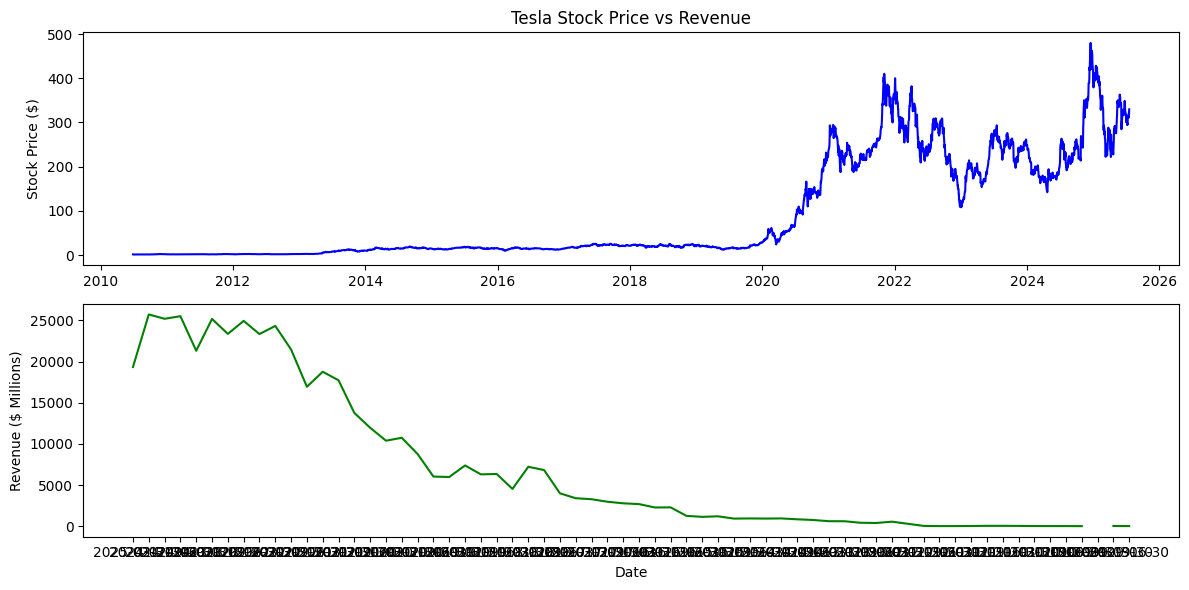

In [5]:
import matplotlib.pyplot as plt

# Plot Tesla stock closing price
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(tesla_data.index, tesla_data["Close"], label="Tesla Stock Price", color="blue")
plt.title("Tesla Stock Price vs Revenue")
plt.ylabel("Stock Price ($)")

# Plot Tesla revenue
plt.subplot(2, 1, 2)
plt.plot(tesla_revenue["Date"], tesla_revenue["Revenue"], label="Revenue", color="green")
plt.ylabel("Revenue ($ Millions)")
plt.xlabel("Date")
plt.tight_layout()
plt.show()

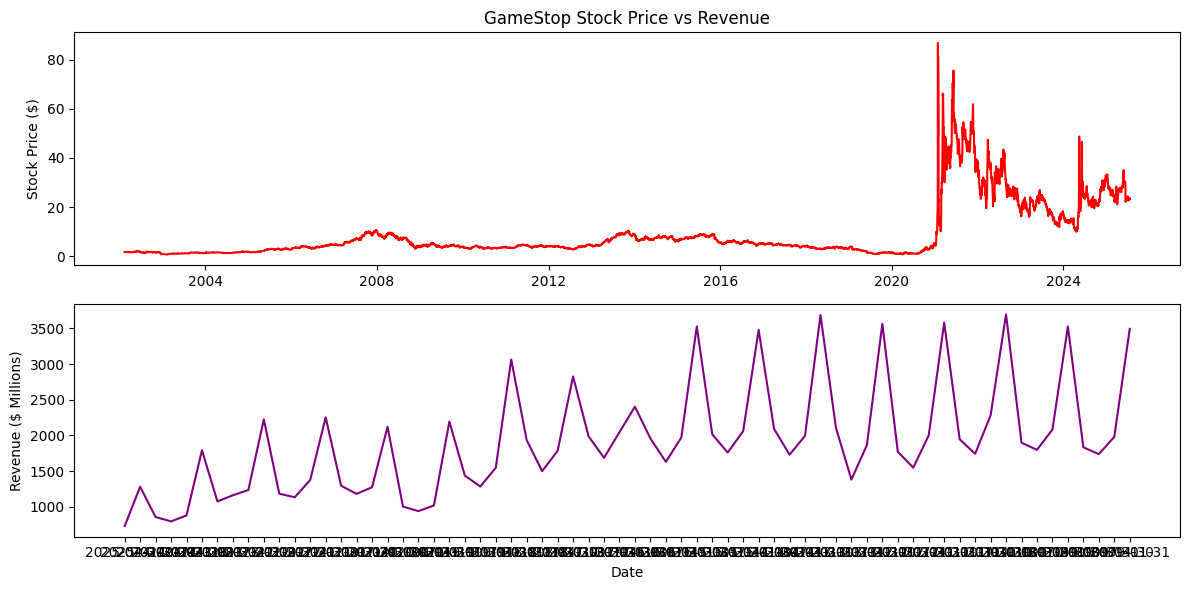

In [6]:
# Plot GameStop stock closing price
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(gamestop_data.index, gamestop_data["Close"], label="GameStop Stock Price", color="red")
plt.title("GameStop Stock Price vs Revenue")
plt.ylabel("Stock Price ($)")

# Plot GameStop revenue
plt.subplot(2, 1, 2)
plt.plot(gamestop_revenue["Date"], gamestop_revenue["Revenue"], label="Revenue", color="purple")
plt.ylabel("Revenue ($ Millions)")
plt.xlabel("Date")
plt.tight_layout()
plt.show()